# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

import ipywidgets as widgets
from matplotlib_venn import venn2

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import DataProject

# Read and clean data

In [135]:
return_to_schooling = 'Data_Return_To_Schooling.dta'
government_expenditure = 'Data_Government_Expenditures.dta'

rts = pd.read_stata(return_to_schooling)
gexp = pd.read_stata(government_expenditure)

In [27]:
eu_countries = [
    "Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", 
    "Czechia", "Denmark", "Estonia", "Finland", "France", 
    "Germany", "Greece", "Hungary", "Ireland", "Italy", 
    "Latvia", "Lithuania", "Luxembourg", "Malta", "Netherlands", 
    "Poland", "Portugal", "Romania", "Slovakia", "Slovenia", 
    "Spain", "Sweden"]


Cleaning the return to schooling dataset

In [154]:
# Step a: Remove all non-european-union countries
I = False
for i in eu_countries :
    I |= rts.isoname.str.contains(i)

rts_eu = rts.loc[I].reset_index()

# Step b.1: Remove returns to schooling for primary, secondary and tertiary education as these are not of interest to us.
for j in ['coef_','lb_','ub_'] :
    drop_these = [j + x for x in ['yrl_pri','yrl_sec','yrl_ter']]
    rts_eu.drop(drop_these, axis = 1, inplace = True)

# Step b.2: Remove the extra index if necessary
# del rts_eu['index']

# Step c: Rename variables for ease of use
rename_dict = {}
rename_dict['isoname'] = 'country'
rename_dict['coef_yrs'] = 'return_to_schooling'
rename_dict['lb_yrs'] = 'lower_rts'
rename_dict['ub_yrs'] = 'upper_rts'
rename_dict['coef_yrs_sex_0'] = 'rts_women'
rename_dict['lb_yrs_sex_0'] = 'lower_rts_women'
rename_dict['ub_yrs_sex_0'] = 'upper_rts_women'
rename_dict['coef_yrs_sex_1'] = 'rts_men'		
rename_dict['lb_yrs_sex_1'] = 'lower_rts_men'
rename_dict['ub_yrs_sex_1'] = 'upper_rts_men'

rts_eu.rename(columns = rename_dict, inplace = True)

# Step d: Change unit into percentages
for key,value in rename_dict.items() :
    if value != 'country' :
        rts_eu[value] = rts_eu[value] * 100
    else :
        continue

# Step e: Sort the dataset ascendingly
rts_eu_sorted = rts_eu.sort_values('return_to_schooling').reset_index()

rts_eu_sorted['CI'] = rts_eu_sorted['upper_rts'] - rts_eu_sorted['lower_rts']


Cleaning the government expenditure dataset.

In [170]:
# Step a: Remove all non-european-union countries
I = False
for i in eu_countries :
    I |= gexp.isoname.str.contains(i)

gexp_eu = gexp.loc[I].reset_index()

# We want to check how a countrys wealth and their government spendings into education (as a whole) correlates with the return to schooling.
keep_these = ['isoname','iso','year','gdp','gova_educ']
gexp_eu = gexp_eu.loc[:,keep_these]

# We want to convert the spending into billions
for i in ['gdp','gova_educ'] :
    gexp_eu[i + '_bil'] = gexp_eu[i] / 1000000000
    del gexp_eu[i]

# And rename isoname to country such that it matches the other data
gexp_eu.rename(columns = {'isoname':'country'}, inplace = True)


gexp_eu.head(50)

,country,iso,year,gdp_bil,gova_educ_bil
0,Austria,AT,1980.0,77.151765,3.932688
1,Austria,AT,1981.0,82.214931,4.485794
2,Austria,AT,1982.0,88.359830,4.816812
3,Austria,AT,1983.0,94.146679,5.076530
4,Austria,AT,1984.0,98.857385,5.321335
5,Austria,AT,1985.0,104.329803,5.618765
6,Austria,AT,1986.0,109.880471,6.140484
7,Austria,AT,1987.0,114.085791,6.234195
8,Austria,AT,1988.0,119.645286,6.316194
9,Austria,AT,1989.0,127.981239,6.535413


Plotting the return to schooling for all EU countries.

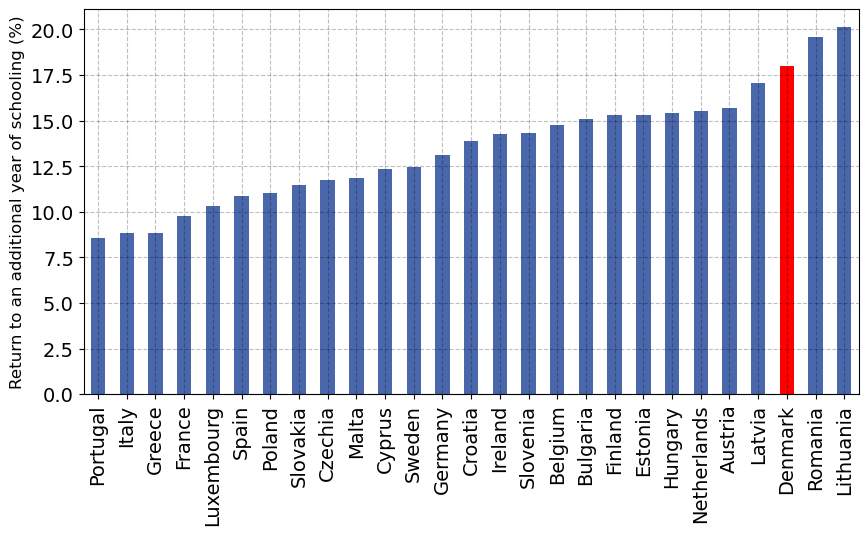

In [152]:
cbs_blue = (73/255, 103/255, 170/255) ; ku_red = (144/255, 26/255, 30/255)
ax = rts_eu_sorted.plot(x = 'country', y = 'return_to_schooling', kind = 'bar', 
                        figsize=(10, 5), color = cbs_blue, legend = False, yerr = rts_eu_sorted['CI'], capsize=4,
                        error_kw={'ecolor': 'orange', 'elinewidth': 2}) ; 

bars = ax.patches
DK = rts_eu_sorted.index[rts_eu_sorted['country'] == 'Denmark'].tolist()[0]
bars[DK].set_facecolor('red')

ax.set_xlabel('') 
ax.set_ylabel('Return to an additional year of schooling (%)', fontsize = 12) ;

Import your data, either through an API or manually, and load it. 

## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

In [2]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


interactive(children=(Output(),), _dom_classes=('widget-interact',))

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

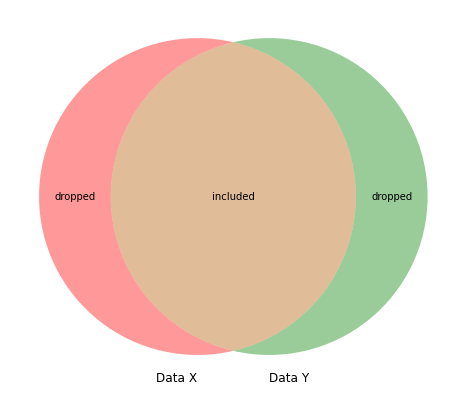

In [3]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.